### Non-linear regression

## 0.Data

In [2]:
import pandas as pd

In [4]:
coupon = pd.read_excel("http://byungwan.com/class/Coupon_Sample.xlsx")
coupon.head()

,CID,Gender,Age,CClass,Discount,Visits,Email,SMS,MStatus,Purchases,Sales
0,1,0,41,2,0,1,0,1,1,1,0.92
1,2,0,41,1,0,0,0,0,0,0,0.00
2,3,0,30,2,0,3,0,0,0,1,1.54
3,4,0,28,2,0,2,0,0,0,2,0.88
4,5,1,24,2,1,5,0,0,0,2,0.53


### 1. Linear regression

In [6]:
import statsmodels.api as sm

In [8]:
y = coupon.iloc[:, 4] # discount
# why some received discount due to purchases
x = coupon.iloc[:, 9]
# 이거의 가설은 purchase 횟수에 따라 discount가 주어지는지 말지 인건가?

In [10]:
x_c = sm.add_constant(x)
reg = sm.OLS(y, x_c).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Discount   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     10.61
Date:                Thu, 16 Oct 2025   Prob (F-statistic):            0.00120
Time:                        10:41:27   Log-Likelihood:                -281.39
No. Observations:                 499   AIC:                             566.8
Df Residuals:                     497   BIC:                             575.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1903      0.025      7.521      0.0

In [11]:
# make sure 5 assumptions are met
# multicol, homoscedasticity 
# linearity can be checked through regression plot

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
y_pred = reg.predict()

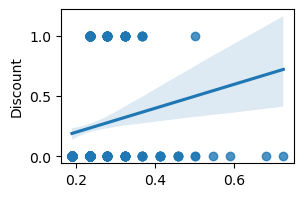

In [14]:
plt.figure(figsize=(3,2))
sns.regplot(x = y_pred, y = y)
plt.show()

In [15]:
# this blue area got thin -> thick, this may violate the assumption of linearity

In [16]:
residual = reg.resid

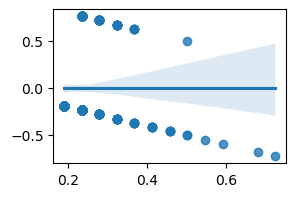

In [17]:
plt.figure(figsize=(3,2))
sns.regplot(x = y_pred, y = residual)
plt.show()

In [18]:
# linear regression w/ squared terms -> we can just add squared x

In [20]:
# For discrete (binary) dependent variable -> linear regression may not make sense due to linear fit
# our y limit is 0~1 but linear function does not have the boundary
# if y is a dummy variable, we may be able to use it, but it might have problems
# if there is a curve that does not go lower than 0 and goes higher than 1 as it goes to infinity -> may make more sense

In [21]:
# z -> latent variable approach
# True relationship : z = a + bx + e
# what we observe: y = 1 if z>= threshold
# because z is unknow, OLS cannot be used, instead w e use maximum likelihood estimation(MLE)
# we need to make assumptions - logit model, probit model
## logit model) assume errors -> logistic dist
## probit) assume errors -> normal dist

In [22]:
# CDE looks like s-curve what is exactly what we want them to look like

### 2. Non-linear regression

In [28]:
logit1 = sm.Logit(y, x_c).fit()
print(logit1.summary())

Optimization terminated successfully.
         Current function value: 0.546822
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Discount   No. Observations:                  499
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Oct 2025   Pseudo R-squ.:                 0.01686
Time:                        11:02:17   Log-Likelihood:                -272.86
converged:                       True   LL-Null:                       -277.54
Covariance Type:            nonrobust   LLR p-value:                  0.002220
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4036      0.142     -9.913      0.000      -1.681      -1.126
Purchases      0.2116      0.

In [1]:
# Interpretation in linear regression : if x is increased by 1 unit y is increased by b unit

In [31]:
# 해석: if x is increased by 1 unit, log (y/(1-y)) is increased by b unit
# One unit increase in "purchases" increased the odds of using a discount coupon by about 24%
### 이거는 ppt 확인하기

In [32]:
logit1.params

const       -1.403628
Purchases    0.211584
dtype: float64

In [33]:
import numpy as np

In [34]:
np.exp(logit1.params)

const        0.245704
Purchases    1.235633
dtype: float64

In [35]:
coupon.head()

,CID,Gender,Age,CClass,Discount,Visits,Email,SMS,MStatus,Purchases,Sales
0,1,0,41,2,0,1,0,1,1,1,0.92
1,2,0,41,1,0,0,0,0,0,0,0.00
2,3,0,30,2,0,3,0,0,0,1,1.54
3,4,0,28,2,0,2,0,0,0,2,0.88
4,5,1,24,2,1,5,0,0,0,2,0.53


In [36]:
x2 = coupon.iloc[:, [9, 7]]

In [38]:
x2_c = sm.add_constant(x2)

In [40]:
logit2 = sm.Logit(y, x2_c).fit()
print(logit2.summary())

Optimization terminated successfully.
         Current function value: 0.541568
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Discount   No. Observations:                  499
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            2
Date:                Thu, 16 Oct 2025   Pseudo R-squ.:                 0.02631
Time:                        11:20:02   Log-Likelihood:                -270.24
converged:                       True   LL-Null:                       -277.54
Covariance Type:            nonrobust   LLR p-value:                 0.0006749
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5491      0.158     -9.788      0.000      -1.859      -1.239
Purchases      0.2162      0.

In [41]:
# interpretting p-value is the same

In [42]:
logit2.params

const       -1.549073
Purchases    0.216167
SMS          0.551363
dtype: float64

In [43]:
np.exp(logit2.params)

const        0.212445
Purchases    1.241309
SMS          1.735618
dtype: float64

In [44]:
print(logit1.summary2())

                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: Discount         Pseudo R-squared: 0.017    
Date:               2025-10-16 11:24 AIC:              549.7284 
No. Observations:   499              BIC:              558.1536 
Df Model:           1                Log-Likelihood:   -272.86  
Df Residuals:       497              LL-Null:          -277.54  
Converged:          1.0000           LLR p-value:      0.0022195
No. Iterations:     5.0000           Scale:            1.0000   
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const        -1.4036    0.1416  -9.9134  0.0000  -1.6811  -1.1261
Purchases     0.2116    0.0700   3.0240  0.0025   0.0744   0.3487



In [45]:
# difference is having AIC, BIC - smaller the better
print(logit2.summary2())

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Discount         Pseudo R-squared: 0.026     
Date:               2025-10-16 11:26 AIC:              546.4850  
No. Observations:   499              BIC:              559.1228  
Df Model:           2                Log-Likelihood:   -270.24   
Df Residuals:       496              LL-Null:          -277.54   
Converged:          1.0000           LLR p-value:      0.00067489
No. Iterations:     5.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -1.5491    0.1583  -9.7882  0.0000  -1.8593  -1.2389
Purchases      0.2162    0.0701   3.0858  0.0020   0.0789   0.3535
SMS            0.5514    0.2372   2.3247  0.0201   0.0865   1.0162



In [47]:
# AIC 549.7 -> 546.5 smaller the better
# BIC 558 -> 559 ?? 해석이 어떤지 놓침

In [48]:
probit = sm.Probit(y, x2_c).fit()
print(probit.summary())

Optimization terminated successfully.
         Current function value: 0.540599
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:               Discount   No. Observations:                  499
Model:                         Probit   Df Residuals:                      496
Method:                           MLE   Df Model:                            2
Date:                Thu, 16 Oct 2025   Pseudo R-squ.:                 0.02805
Time:                        11:29:51   Log-Likelihood:                -269.76
converged:                       True   LL-Null:                       -277.54
Covariance Type:            nonrobust   LLR p-value:                 0.0004161
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9557      0.092    -10.350      0.000      -1.137      -0.775
Purchases      0.1379      0.

In [ ]:
# how to interpret coef